In [1]:
from settings import Settings
from utils.datasets import MaestroDataset
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.nn.init
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
settings = Settings() # Set Extra Settings in settings.py

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cpu


In [4]:
dataset = MaestroDataset("train", settings=settings)

In [5]:
print('total number : {}'.format(len(dataset)))

total number : 144910


In [6]:
filt, vel = dataset[10]

In [7]:
filt[:64].shape

(64, 128)

In [8]:
class lstm_Model(nn.Module):
    def __init__(self, n_of_frames,n_of_cnn_frames, kernel_size, output_channel1, output_channel2):
        super(lstm_Model, self).__init__()

        self.n_of_frames = settings.length
        self.n_of_cnn_frames = n_of_cnn_frames
        self.kernel_size = kernel_size
        self.output_channel1 = output_channel1
        self.output_channel2 = output_channel2
        self.Rw1 = n_of_cnn_frames - kernel_size + 1
        self.Rh1 = 128 - kernel_size + 1
        self.Rw2 = (self.Rw1//2) - kernel_size + 1
        self.Rh2 = (self.Rh1//2) - kernel_size + 1
        self.Rw = self.Rw2//2
        self.Rh = self.Rh2//2
        self.sigmoid = nn.Sigmoid()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, output_channel1, kernel_size),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(output_channel1, output_channel2, kernel_size),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.LSTM(1*self.Rh*self.Rw, 128)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out, (_, _) = self.layer3(out.view(x.size(0), 1, -1))
        out = self.sigmoid(out)

        return out

    def loss(self, output, target):
        loss = nn.MSELoss(output.view(1, -1), target)

        return loss

1 ,  0  LOSS:  0.25003141164779663
1 ,  1  LOSS:  0.2499043494462967
1 ,  2  LOSS:  0.24976997077465057
1 ,  3  LOSS:  0.24964019656181335
1 ,  4  LOSS:  0.2495085448026657
1 ,  5  LOSS:  0.24937781691551208
1 ,  6  LOSS:  0.24924705922603607
1 ,  7  LOSS:  0.24911625683307648
1 ,  8  LOSS:  0.2489854097366333
1 ,  9  LOSS:  0.24885450303554535
1 ,  10  LOSS:  0.24872352182865143
1 ,  11  LOSS:  0.24859246611595154
1 ,  12  LOSS:  0.2484613060951233
1 ,  13  LOSS:  0.2483300417661667
1 ,  14  LOSS:  0.24819865822792053
1 ,  15  LOSS:  0.24806715548038483
1 ,  16  LOSS:  0.24793550372123718
1 ,  17  LOSS:  0.2478036880493164
1 ,  18  LOSS:  0.2476717084646225
1 ,  19  LOSS:  0.24753953516483307
1 ,  20  LOSS:  0.24740716814994812
1 ,  21  LOSS:  0.24727457761764526
1 ,  22  LOSS:  0.2471417635679245
1 ,  23  LOSS:  0.24700868129730225
1 ,  24  LOSS:  0.2468753457069397
1 ,  25  LOSS:  0.24674172699451447
1 ,  26  LOSS:  0.24660779535770416
1 ,  27  LOSS:  0.24647356569766998
1 ,  28  LO

3 ,  0  LOSS:  0.20188216865062714
3 ,  1  LOSS:  0.20165827870368958
3 ,  2  LOSS:  0.20143459737300873
3 ,  3  LOSS:  0.2012110948562622
3 ,  4  LOSS:  0.2009877860546112
3 ,  5  LOSS:  0.20076468586921692
3 ,  6  LOSS:  0.20054179430007935
3 ,  7  LOSS:  0.20031912624835968
3 ,  8  LOSS:  0.20009666681289673
3 ,  9  LOSS:  0.19987444579601288
3 ,  10  LOSS:  0.19965246319770813
3 ,  11  LOSS:  0.19943071901798248
3 ,  12  LOSS:  0.19920919835567474
3 ,  13  LOSS:  0.1989879459142685
3 ,  14  LOSS:  0.19876694679260254
3 ,  15  LOSS:  0.19854621589183807
3 ,  16  LOSS:  0.1983257383108139
3 ,  17  LOSS:  0.19810552895069122
3 ,  18  LOSS:  0.19788560271263123
3 ,  19  LOSS:  0.19766594469547272
3 ,  20  LOSS:  0.1974465698003769
3 ,  21  LOSS:  0.19722749292850494
3 ,  22  LOSS:  0.19700871407985687
3 ,  23  LOSS:  0.19679021835327148
3 ,  24  LOSS:  0.19657202064990997
3 ,  25  LOSS:  0.19635413587093353
3 ,  26  LOSS:  0.19613656401634216
3 ,  27  LOSS:  0.19591930508613586
3 ,  28

4 ,  123  LOSS:  0.15812498331069946
4 ,  124  LOSS:  0.1580045074224472
4 ,  125  LOSS:  0.1578844040632248
4 ,  126  LOSS:  0.15776465833187103
4 ,  127  LOSS:  0.15764527022838593
Data:5 cost=0.1662879935465753
5 ,  0  LOSS:  0.15736950933933258
5 ,  1  LOSS:  0.1572493612766266
5 ,  2  LOSS:  0.15713125467300415
5 ,  3  LOSS:  0.15701353549957275
5 ,  4  LOSS:  0.15689615905284882
5 ,  5  LOSS:  0.15677917003631592
5 ,  6  LOSS:  0.15666252374649048
5 ,  7  LOSS:  0.15654624998569489
5 ,  8  LOSS:  0.15643033385276794
5 ,  9  LOSS:  0.15631477534770966
5 ,  10  LOSS:  0.15619957447052002
5 ,  11  LOSS:  0.15608471632003784
5 ,  12  LOSS:  0.15597021579742432
5 ,  13  LOSS:  0.15585607290267944
5 ,  14  LOSS:  0.15574227273464203
5 ,  15  LOSS:  0.15562881529331207
5 ,  16  LOSS:  0.15551571547985077
5 ,  17  LOSS:  0.15540294349193573
5 ,  18  LOSS:  0.15529052913188934
5 ,  19  LOSS:  0.15517844259738922
5 ,  20  LOSS:  0.15506671369075775
5 ,  21  LOSS:  0.15495531260967255
5 ,  

6 ,  121  LOSS:  0.13639281690120697
6 ,  122  LOSS:  0.13633444905281067
6 ,  123  LOSS:  0.1362762451171875
6 ,  124  LOSS:  0.13621817529201508
6 ,  125  LOSS:  0.13616026937961578
6 ,  126  LOSS:  0.13610249757766724
6 ,  127  LOSS:  0.13604487478733063
Data:7 cost=0.14014266652520746
7 ,  0  LOSS:  0.13607682287693024
7 ,  1  LOSS:  0.13601943850517273
7 ,  2  LOSS:  0.13596220314502716
7 ,  3  LOSS:  0.13590510189533234
7 ,  4  LOSS:  0.13584813475608826
7 ,  5  LOSS:  0.13579131662845612
7 ,  6  LOSS:  0.1357346475124359
7 ,  7  LOSS:  0.13567809760570526
7 ,  8  LOSS:  0.13562171161174774
7 ,  9  LOSS:  0.13556544482707977
7 ,  10  LOSS:  0.13550932705402374
7 ,  11  LOSS:  0.13545335829257965
7 ,  12  LOSS:  0.1353975087404251
7 ,  13  LOSS:  0.1353418081998825
7 ,  14  LOSS:  0.13528625667095184
7 ,  15  LOSS:  0.13523082435131073
7 ,  16  LOSS:  0.13517554104328156
7 ,  17  LOSS:  0.13512039184570312
7 ,  18  LOSS:  0.13506539165973663
7 ,  19  LOSS:  0.1350105255842209
7 , 

8 ,  119  LOSS:  0.12531678378582
8 ,  120  LOSS:  0.12528416514396667
8 ,  121  LOSS:  0.12525160610675812
8 ,  122  LOSS:  0.12521912157535553
8 ,  123  LOSS:  0.1251867115497589
8 ,  124  LOSS:  0.12515436112880707
8 ,  125  LOSS:  0.1251220703125
8 ,  126  LOSS:  0.1250898540019989
8 ,  127  LOSS:  0.12505771219730377
Data:9 cost=0.12729421793483198
9 ,  0  LOSS:  0.12503138184547424
9 ,  1  LOSS:  0.12499935179948807
9 ,  2  LOSS:  0.12496736645698547
9 ,  3  LOSS:  0.12493546307086945
9 ,  4  LOSS:  0.1249036118388176
9 ,  5  LOSS:  0.12487183511257172
9 ,  6  LOSS:  0.12484011799097061
9 ,  7  LOSS:  0.12480846047401428
9 ,  8  LOSS:  0.12477687001228333
9 ,  9  LOSS:  0.12474533915519714
9 ,  10  LOSS:  0.12471388280391693
9 ,  11  LOSS:  0.1246824860572815
9 ,  12  LOSS:  0.12465114891529083
9 ,  13  LOSS:  0.12461987137794495
9 ,  14  LOSS:  0.12458866834640503
9 ,  15  LOSS:  0.12455751746892929
9 ,  16  LOSS:  0.12452644109725952
9 ,  17  LOSS:  0.12449542433023453
9 ,  18 

10 ,  114  LOSS:  0.11870352923870087
10 ,  115  LOSS:  0.11868330836296082
10 ,  116  LOSS:  0.11866311728954315
10 ,  117  LOSS:  0.11864296346902847
10 ,  118  LOSS:  0.11862284690141678
10 ,  119  LOSS:  0.11860276013612747
10 ,  120  LOSS:  0.11858271062374115
10 ,  121  LOSS:  0.11856269836425781
10 ,  122  LOSS:  0.11854271590709686
10 ,  123  LOSS:  0.1185227707028389
10 ,  124  LOSS:  0.11850285530090332
10 ,  125  LOSS:  0.11848298460245132
10 ,  126  LOSS:  0.11846313625574112
10 ,  127  LOSS:  0.1184433251619339
Data:11 cost=0.11979933432303369
11 ,  0  LOSS:  0.11845409870147705
11 ,  1  LOSS:  0.11843438446521759
11 ,  2  LOSS:  0.11841470003128052
11 ,  3  LOSS:  0.11839506030082703
11 ,  4  LOSS:  0.11837545037269592
11 ,  5  LOSS:  0.1183558776974678
11 ,  6  LOSS:  0.11833634227514267
11 ,  7  LOSS:  0.11831683665513992
11 ,  8  LOSS:  0.11829736828804016
11 ,  9  LOSS:  0.11827793717384338
11 ,  10  LOSS:  0.118258535861969
11 ,  11  LOSS:  0.11823916435241699
11 ,  

12 ,  109  LOSS:  0.1146601065993309
12 ,  110  LOSS:  0.1146465390920639
12 ,  111  LOSS:  0.1146329864859581
12 ,  112  LOSS:  0.11461944878101349
12 ,  113  LOSS:  0.11460594087839127
12 ,  114  LOSS:  0.11459244787693024
12 ,  115  LOSS:  0.1145789846777916
12 ,  116  LOSS:  0.11456552892923355
12 ,  117  LOSS:  0.1145521029829979
12 ,  118  LOSS:  0.11453869193792343
12 ,  119  LOSS:  0.11452530324459076
12 ,  120  LOSS:  0.11451192945241928
12 ,  121  LOSS:  0.1144985780119896
12 ,  122  LOSS:  0.1144852414727211
12 ,  123  LOSS:  0.114471934735775
12 ,  124  LOSS:  0.11445863544940948
12 ,  125  LOSS:  0.11444536596536636
12 ,  126  LOSS:  0.11443211138248444
12 ,  127  LOSS:  0.1144188791513443
Data:13 cost=0.11531465034931898
13 ,  0  LOSS:  0.1144077405333519
13 ,  1  LOSS:  0.11439456045627594
13 ,  2  LOSS:  0.11438140273094177
13 ,  3  LOSS:  0.11436827480792999
13 ,  4  LOSS:  0.1143551617860794
13 ,  5  LOSS:  0.11434206366539001
13 ,  6  LOSS:  0.11432898789644241
13 , 

14 ,  77  LOSS:  0.11208649724721909
14 ,  78  LOSS:  0.11207662522792816
14 ,  79  LOSS:  0.11206677556037903
14 ,  80  LOSS:  0.11205693334341049
14 ,  81  LOSS:  0.11204711347818375
14 ,  82  LOSS:  0.112037293612957
14 ,  83  LOSS:  0.11202749609947205
14 ,  84  LOSS:  0.11201770603656769
14 ,  85  LOSS:  0.11200793087482452
14 ,  86  LOSS:  0.11199817061424255
14 ,  87  LOSS:  0.11198841780424118
14 ,  88  LOSS:  0.1119786873459816
14 ,  89  LOSS:  0.11196895688772202
14 ,  90  LOSS:  0.11195924878120422
14 ,  91  LOSS:  0.11194954812526703
14 ,  92  LOSS:  0.11193986237049103
14 ,  93  LOSS:  0.11193018406629562
14 ,  94  LOSS:  0.11192052811384201
14 ,  95  LOSS:  0.111910879611969
14 ,  96  LOSS:  0.11190123856067657
14 ,  97  LOSS:  0.11189161986112595
14 ,  98  LOSS:  0.11188200861215591
14 ,  99  LOSS:  0.11187240481376648
14 ,  100  LOSS:  0.11186282336711884
14 ,  101  LOSS:  0.11185324192047119
14 ,  102  LOSS:  0.11184368282556534
14 ,  103  LOSS:  0.11183413118124008
14

16 ,  43  LOSS:  0.11018052697181702
16 ,  44  LOSS:  0.11017303913831711
16 ,  45  LOSS:  0.1101655587553978
16 ,  46  LOSS:  0.11015808582305908
16 ,  47  LOSS:  0.11015062779188156
16 ,  48  LOSS:  0.11014317721128464
16 ,  49  LOSS:  0.11013573408126831
16 ,  50  LOSS:  0.11012829840183258
16 ,  51  LOSS:  0.11012087017297745
16 ,  52  LOSS:  0.11011344939470291
16 ,  53  LOSS:  0.11010604351758957
16 ,  54  LOSS:  0.11009864509105682
16 ,  55  LOSS:  0.11009125411510468
16 ,  56  LOSS:  0.11008387058973312
16 ,  57  LOSS:  0.11007649451494217
16 ,  58  LOSS:  0.11006913334131241
16 ,  59  LOSS:  0.11006177216768265
16 ,  60  LOSS:  0.11005442589521408
16 ,  61  LOSS:  0.11004708707332611
16 ,  62  LOSS:  0.11003975570201874
16 ,  63  LOSS:  0.11003243178129196
16 ,  64  LOSS:  0.11002512276172638
16 ,  65  LOSS:  0.1100178137421608
16 ,  66  LOSS:  0.11001051962375641
16 ,  67  LOSS:  0.11000323295593262
16 ,  68  LOSS:  0.10999595373868942
16 ,  69  LOSS:  0.10998868197202682
16 

18 ,  8  LOSS:  0.10867246985435486
18 ,  9  LOSS:  0.10866659134626389
18 ,  10  LOSS:  0.1086607277393341
18 ,  11  LOSS:  0.10865486413240433
18 ,  12  LOSS:  0.10864900797605515
18 ,  13  LOSS:  0.10864315927028656
18 ,  14  LOSS:  0.10863731056451797
18 ,  15  LOSS:  0.10863146930932999
18 ,  16  LOSS:  0.10862564295530319
18 ,  17  LOSS:  0.1086198166012764
18 ,  18  LOSS:  0.1086139976978302
18 ,  19  LOSS:  0.1086081862449646
18 ,  20  LOSS:  0.108602374792099
18 ,  21  LOSS:  0.108596570789814
18 ,  22  LOSS:  0.10859077423810959
18 ,  23  LOSS:  0.10858498513698578
18 ,  24  LOSS:  0.10857920348644257
18 ,  25  LOSS:  0.10857342928647995
18 ,  26  LOSS:  0.10856765508651733
18 ,  27  LOSS:  0.10856188833713531
18 ,  28  LOSS:  0.10855613648891449
18 ,  29  LOSS:  0.10855038464069366
18 ,  30  LOSS:  0.10854463279247284
18 ,  31  LOSS:  0.10853889584541321
18 ,  32  LOSS:  0.10853315889835358
18 ,  33  LOSS:  0.10852743685245514
18 ,  34  LOSS:  0.1085217148065567
18 ,  35  LO

19 ,  104  LOSS:  0.10752858221530914
19 ,  105  LOSS:  0.10752391815185547
19 ,  106  LOSS:  0.10751926153898239
19 ,  107  LOSS:  0.10751461237668991
19 ,  108  LOSS:  0.10750996321439743
19 ,  109  LOSS:  0.10750531405210495
19 ,  110  LOSS:  0.10750067234039307
19 ,  111  LOSS:  0.10749603807926178
19 ,  112  LOSS:  0.10749141126871109
19 ,  113  LOSS:  0.1074867844581604
19 ,  114  LOSS:  0.10748215764760971
19 ,  115  LOSS:  0.10747754573822021
19 ,  116  LOSS:  0.10747293382883072
19 ,  117  LOSS:  0.10746832191944122
19 ,  118  LOSS:  0.10746371746063232
19 ,  119  LOSS:  0.10745912045240402
19 ,  120  LOSS:  0.10745452344417572
19 ,  121  LOSS:  0.10744994133710861
19 ,  122  LOSS:  0.10744535177946091
19 ,  123  LOSS:  0.1074407696723938
19 ,  124  LOSS:  0.10743619501590729
19 ,  125  LOSS:  0.10743162035942078
19 ,  126  LOSS:  0.10742705315351486
19 ,  127  LOSS:  0.10742249339818954
Data:20 cost=0.10772479342995211
20 ,  0  LOSS:  0.10741794854402542
20 ,  1  LOSS:  0.107

21 ,  68  LOSS:  0.10657031089067459
21 ,  69  LOSS:  0.10656654089689255
21 ,  70  LOSS:  0.1065627709031105
21 ,  71  LOSS:  0.10655900835990906
21 ,  72  LOSS:  0.10655525326728821
21 ,  73  LOSS:  0.10655149817466736
21 ,  74  LOSS:  0.10654774308204651
21 ,  75  LOSS:  0.10654399544000626
21 ,  76  LOSS:  0.1065402552485466
21 ,  77  LOSS:  0.10653651505708694
21 ,  78  LOSS:  0.10653277486562729
21 ,  79  LOSS:  0.10652904212474823
21 ,  80  LOSS:  0.10652530938386917
21 ,  81  LOSS:  0.10652158409357071
21 ,  82  LOSS:  0.10651785880327225
21 ,  83  LOSS:  0.10651413351297379
21 ,  84  LOSS:  0.10651042312383652
21 ,  85  LOSS:  0.10650670528411865
21 ,  86  LOSS:  0.10650299489498138
21 ,  87  LOSS:  0.10649928450584412
21 ,  88  LOSS:  0.10649558156728745
21 ,  89  LOSS:  0.10649188607931137
21 ,  90  LOSS:  0.1064881831407547
21 ,  91  LOSS:  0.10648449510335922
21 ,  92  LOSS:  0.10648080706596375
21 ,  93  LOSS:  0.10647711902856827
21 ,  94  LOSS:  0.10647343099117279
21 ,

23 ,  56  LOSS:  0.10570675134658813
23 ,  57  LOSS:  0.10570371896028519
23 ,  58  LOSS:  0.10570069402456284
23 ,  59  LOSS:  0.10569767653942108
23 ,  60  LOSS:  0.10569465160369873
23 ,  61  LOSS:  0.10569163411855698
23 ,  62  LOSS:  0.10568862408399582
23 ,  63  LOSS:  0.10568561404943466
23 ,  64  LOSS:  0.10568259656429291
23 ,  65  LOSS:  0.10567959398031235
23 ,  66  LOSS:  0.10567659139633179
23 ,  67  LOSS:  0.10567358881235123
23 ,  68  LOSS:  0.10567059367895126
23 ,  69  LOSS:  0.1056675910949707
23 ,  70  LOSS:  0.10566460341215134
23 ,  71  LOSS:  0.10566160827875137
23 ,  72  LOSS:  0.105658620595932
23 ,  73  LOSS:  0.10565563291311264
23 ,  74  LOSS:  0.10565265268087387
23 ,  75  LOSS:  0.1056496724486351
23 ,  76  LOSS:  0.10564669221639633
23 ,  77  LOSS:  0.10564371943473816
23 ,  78  LOSS:  0.10564074665307999
23 ,  79  LOSS:  0.10563777387142181
23 ,  80  LOSS:  0.10563480108976364
23 ,  81  LOSS:  0.10563183575868607
23 ,  82  LOSS:  0.10562887787818909
23 , 

25 ,  47  LOSS:  0.10507792234420776
25 ,  48  LOSS:  0.10507546365261078
25 ,  49  LOSS:  0.10507301241159439
25 ,  50  LOSS:  0.105070561170578
25 ,  51  LOSS:  0.10506810992956161
25 ,  52  LOSS:  0.10506565868854523
25 ,  53  LOSS:  0.10506321489810944
25 ,  54  LOSS:  0.10506077110767365
25 ,  55  LOSS:  0.10505832731723785
25 ,  56  LOSS:  0.10505588352680206
25 ,  57  LOSS:  0.10505344718694687
25 ,  58  LOSS:  0.10505101084709167
25 ,  59  LOSS:  0.10504857450723648
25 ,  60  LOSS:  0.10504614561796188
25 ,  61  LOSS:  0.10504370927810669
25 ,  62  LOSS:  0.10504128038883209
25 ,  63  LOSS:  0.1050388514995575
25 ,  64  LOSS:  0.1050364300608635
25 ,  65  LOSS:  0.1050340086221695
25 ,  66  LOSS:  0.1050315797328949
25 ,  67  LOSS:  0.1050291657447815
25 ,  68  LOSS:  0.1050267443060875
25 ,  69  LOSS:  0.10502433031797409
25 ,  70  LOSS:  0.10502191632986069
25 ,  71  LOSS:  0.10501950979232788
25 ,  72  LOSS:  0.10501709580421448
25 ,  73  LOSS:  0.10501468926668167
25 ,  74 

27 ,  14  LOSS:  0.1045607253909111
27 ,  15  LOSS:  0.10455866903066635
27 ,  16  LOSS:  0.1045566126704216
27 ,  17  LOSS:  0.10455456376075745
27 ,  18  LOSS:  0.10455251485109329
27 ,  19  LOSS:  0.10455046594142914
27 ,  20  LOSS:  0.10454841703176498
27 ,  21  LOSS:  0.10454636812210083
27 ,  22  LOSS:  0.10454432666301727
27 ,  23  LOSS:  0.10454228520393372
27 ,  24  LOSS:  0.10454024374485016
27 ,  25  LOSS:  0.1045382022857666
27 ,  26  LOSS:  0.10453616082668304
27 ,  27  LOSS:  0.10453412681818008
27 ,  28  LOSS:  0.10453209280967712
27 ,  29  LOSS:  0.10453005880117416
27 ,  30  LOSS:  0.1045280247926712
27 ,  31  LOSS:  0.10452599823474884
27 ,  32  LOSS:  0.10452397167682648
27 ,  33  LOSS:  0.10452193766832352
27 ,  34  LOSS:  0.10451991111040115
27 ,  35  LOSS:  0.10451789200305939
27 ,  36  LOSS:  0.10451586544513702
27 ,  37  LOSS:  0.10451384633779526
27 ,  38  LOSS:  0.10451182723045349
27 ,  39  LOSS:  0.10450980812311172
27 ,  40  LOSS:  0.10450778901576996
27 , 

29 ,  7  LOSS:  0.10411781072616577
29 ,  8  LOSS:  0.10411610454320908
29 ,  9  LOSS:  0.10411439090967178
29 ,  10  LOSS:  0.10411268472671509
29 ,  11  LOSS:  0.10411097854375839
29 ,  12  LOSS:  0.1041092723608017
29 ,  13  LOSS:  0.1041075736284256
29 ,  14  LOSS:  0.1041058674454689
29 ,  15  LOSS:  0.1041041687130928
29 ,  16  LOSS:  0.10410246253013611
29 ,  17  LOSS:  0.10410076379776001
29 ,  18  LOSS:  0.10409906506538391
29 ,  19  LOSS:  0.10409736633300781
29 ,  20  LOSS:  0.10409567505121231
29 ,  21  LOSS:  0.10409398376941681
29 ,  22  LOSS:  0.10409228503704071
29 ,  23  LOSS:  0.10409059375524521
29 ,  24  LOSS:  0.10408890247344971
29 ,  25  LOSS:  0.1040872111916542
29 ,  26  LOSS:  0.1040855273604393
29 ,  27  LOSS:  0.1040838360786438
29 ,  28  LOSS:  0.1040821522474289
29 ,  29  LOSS:  0.10408046841621399
29 ,  30  LOSS:  0.10407878458499908
29 ,  31  LOSS:  0.10407710075378418
29 ,  32  LOSS:  0.10407541692256927
29 ,  33  LOSS:  0.10407374054193497
29 ,  34  LO

31 ,  0  LOSS:  0.10370764136314392
31 ,  1  LOSS:  0.10370619595050812
31 ,  2  LOSS:  0.10370475053787231
31 ,  3  LOSS:  0.10370331257581711
31 ,  4  LOSS:  0.1037018746137619
31 ,  5  LOSS:  0.1037004292011261
31 ,  6  LOSS:  0.10369899123907089
31 ,  7  LOSS:  0.10369755327701569
31 ,  8  LOSS:  0.10369611531496048
31 ,  9  LOSS:  0.10369467735290527
31 ,  10  LOSS:  0.10369323939085007
31 ,  11  LOSS:  0.10369180887937546
31 ,  12  LOSS:  0.10369037091732025
31 ,  13  LOSS:  0.10368893295526505
31 ,  14  LOSS:  0.10368750244379044
31 ,  15  LOSS:  0.10368607193231583
31 ,  16  LOSS:  0.10368464142084122
31 ,  17  LOSS:  0.10368321090936661
31 ,  18  LOSS:  0.1036817878484726
31 ,  19  LOSS:  0.10368035733699799
31 ,  20  LOSS:  0.10367892682552338
31 ,  21  LOSS:  0.10367750376462936
31 ,  22  LOSS:  0.10367608070373535
31 ,  23  LOSS:  0.10367465764284134
31 ,  24  LOSS:  0.10367323458194733
31 ,  25  LOSS:  0.10367181152105331
31 ,  26  LOSS:  0.1036703884601593
31 ,  27  LOSS:

32 ,  98  LOSS:  0.10340608656406403
32 ,  99  LOSS:  0.10340484976768494
32 ,  100  LOSS:  0.10340361297130585
32 ,  101  LOSS:  0.10340236872434616
32 ,  102  LOSS:  0.10340113192796707
32 ,  103  LOSS:  0.10339990258216858
32 ,  104  LOSS:  0.10339866578578949
32 ,  105  LOSS:  0.1033974289894104
32 ,  106  LOSS:  0.10339619964361191
32 ,  107  LOSS:  0.10339496284723282
32 ,  108  LOSS:  0.10339373350143433
32 ,  109  LOSS:  0.10339250415563583
32 ,  110  LOSS:  0.10339127480983734
32 ,  111  LOSS:  0.10339004546403885
32 ,  112  LOSS:  0.10338881611824036
32 ,  113  LOSS:  0.10338758677244186
32 ,  114  LOSS:  0.10338636487722397
32 ,  115  LOSS:  0.10338513553142548
32 ,  116  LOSS:  0.10338391363620758
32 ,  117  LOSS:  0.10338269174098969
32 ,  118  LOSS:  0.10338146239519119
32 ,  119  LOSS:  0.1033802404999733
32 ,  120  LOSS:  0.1033790186047554
32 ,  121  LOSS:  0.1033778041601181
32 ,  122  LOSS:  0.10337658226490021
32 ,  123  LOSS:  0.10337536036968231
32 ,  124  LOSS:  

34 ,  62  LOSS:  0.10314668715000153
34 ,  63  LOSS:  0.10314561426639557
34 ,  64  LOSS:  0.10314454138278961
34 ,  65  LOSS:  0.10314346849918365
34 ,  66  LOSS:  0.1031423956155777
34 ,  67  LOSS:  0.10314133018255234
34 ,  68  LOSS:  0.10314025729894638
34 ,  69  LOSS:  0.10313919186592102
34 ,  70  LOSS:  0.10313811898231506
34 ,  71  LOSS:  0.1031370535492897
34 ,  72  LOSS:  0.10313598811626434
34 ,  73  LOSS:  0.10313492268323898
34 ,  74  LOSS:  0.10313385725021362
34 ,  75  LOSS:  0.10313279181718826
34 ,  76  LOSS:  0.1031317263841629
34 ,  77  LOSS:  0.10313066095113754
34 ,  78  LOSS:  0.10312960296869278
34 ,  79  LOSS:  0.10312853753566742
34 ,  80  LOSS:  0.10312747955322266
34 ,  81  LOSS:  0.1031264141201973
34 ,  82  LOSS:  0.10312535613775253
34 ,  83  LOSS:  0.10312429815530777
34 ,  84  LOSS:  0.103123240172863
34 ,  85  LOSS:  0.10312218219041824
34 ,  86  LOSS:  0.10312112420797348
34 ,  87  LOSS:  0.10312007367610931
34 ,  88  LOSS:  0.10311901569366455
34 ,  8

36 ,  46  LOSS:  0.10290869325399399
36 ,  47  LOSS:  0.10290776938199997
36 ,  48  LOSS:  0.10290684551000595
36 ,  49  LOSS:  0.10290592908859253
36 ,  50  LOSS:  0.10290500521659851
36 ,  51  LOSS:  0.10290408879518509
36 ,  52  LOSS:  0.10290317237377167
36 ,  53  LOSS:  0.10290225595235825
36 ,  54  LOSS:  0.10290133953094482
36 ,  55  LOSS:  0.1029004231095314
36 ,  56  LOSS:  0.10289950668811798
36 ,  57  LOSS:  0.10289859026670456
36 ,  58  LOSS:  0.10289767384529114
36 ,  59  LOSS:  0.10289675742387772
36 ,  60  LOSS:  0.10289584845304489
36 ,  61  LOSS:  0.10289493203163147
36 ,  62  LOSS:  0.10289402306079865
36 ,  63  LOSS:  0.10289310663938522
36 ,  64  LOSS:  0.1028921976685524
36 ,  65  LOSS:  0.10289128869771957
36 ,  66  LOSS:  0.10289037972688675
36 ,  67  LOSS:  0.10288946330547333
36 ,  68  LOSS:  0.1028885617852211
36 ,  69  LOSS:  0.10288764536380768
36 ,  70  LOSS:  0.10288674384355545
36 ,  71  LOSS:  0.10288583487272263
36 ,  72  LOSS:  0.1028849259018898
36 , 

38 ,  10  LOSS:  0.10271547734737396
38 ,  11  LOSS:  0.1027146726846695
38 ,  12  LOSS:  0.10271386802196503
38 ,  13  LOSS:  0.10271306335926056
38 ,  14  LOSS:  0.10271226614713669
38 ,  15  LOSS:  0.10271146148443222
38 ,  16  LOSS:  0.10271066427230835
38 ,  17  LOSS:  0.10270985960960388
38 ,  18  LOSS:  0.10270906239748001
38 ,  19  LOSS:  0.10270826518535614
38 ,  20  LOSS:  0.10270746052265167
38 ,  21  LOSS:  0.1027066633105278
38 ,  22  LOSS:  0.10270586609840393
38 ,  23  LOSS:  0.10270506888628006
38 ,  24  LOSS:  0.10270427167415619
38 ,  25  LOSS:  0.10270348191261292
38 ,  26  LOSS:  0.10270268470048904
38 ,  27  LOSS:  0.10270188748836517
38 ,  28  LOSS:  0.1027010902762413
38 ,  29  LOSS:  0.10270029306411743
38 ,  30  LOSS:  0.10269950330257416
38 ,  31  LOSS:  0.10269870609045029
38 ,  32  LOSS:  0.10269791632890701
38 ,  33  LOSS:  0.10269711911678314
38 ,  34  LOSS:  0.10269632935523987
38 ,  35  LOSS:  0.1026955395936966
38 ,  36  LOSS:  0.10269474983215332
38 , 

39 ,  103  LOSS:  0.10258746892213821
39 ,  104  LOSS:  0.1025867685675621
39 ,  105  LOSS:  0.1025860607624054
39 ,  106  LOSS:  0.10258536040782928
39 ,  107  LOSS:  0.10258465260267258
39 ,  108  LOSS:  0.10258395224809647
39 ,  109  LOSS:  0.10258325189352036
39 ,  110  LOSS:  0.10258255153894424
39 ,  111  LOSS:  0.10258184373378754
39 ,  112  LOSS:  0.10258114337921143
39 ,  113  LOSS:  0.10258044302463531
39 ,  114  LOSS:  0.1025797501206398
39 ,  115  LOSS:  0.10257904976606369
39 ,  116  LOSS:  0.10257834941148758
39 ,  117  LOSS:  0.10257764905691147
39 ,  118  LOSS:  0.10257694870233536
39 ,  119  LOSS:  0.10257624834775925
39 ,  120  LOSS:  0.10257555544376373
39 ,  121  LOSS:  0.10257485508918762
39 ,  122  LOSS:  0.10257416218519211
39 ,  123  LOSS:  0.102573461830616
39 ,  124  LOSS:  0.10257276892662048
39 ,  125  LOSS:  0.10257206857204437
39 ,  126  LOSS:  0.10257137566804886
39 ,  127  LOSS:  0.10257068276405334
Data:40 cost=0.1026159172761254
40 ,  0  LOSS:  0.10254

41 ,  85  LOSS:  0.10241514444351196
41 ,  86  LOSS:  0.10241453349590302
41 ,  87  LOSS:  0.10241391509771347
41 ,  88  LOSS:  0.10241330415010452
41 ,  89  LOSS:  0.10241269320249557
41 ,  90  LOSS:  0.10241208225488663
41 ,  91  LOSS:  0.10241147130727768
41 ,  92  LOSS:  0.10241086035966873
41 ,  93  LOSS:  0.10241024941205978
41 ,  94  LOSS:  0.10240963846445084
41 ,  95  LOSS:  0.10240903496742249
41 ,  96  LOSS:  0.10240842401981354
41 ,  97  LOSS:  0.10240781307220459
41 ,  98  LOSS:  0.10240720957517624
41 ,  99  LOSS:  0.10240659862756729
41 ,  100  LOSS:  0.10240598767995834
41 ,  101  LOSS:  0.10240538418292999
41 ,  102  LOSS:  0.10240477323532104
41 ,  103  LOSS:  0.1024041697382927
41 ,  104  LOSS:  0.10240355879068375
41 ,  105  LOSS:  0.1024029552936554
41 ,  106  LOSS:  0.10240235179662704
41 ,  107  LOSS:  0.1024017482995987
41 ,  108  LOSS:  0.10240113735198975
41 ,  109  LOSS:  0.1024005338549614
41 ,  110  LOSS:  0.10239993035793304
41 ,  111  LOSS:  0.10239932686

43 ,  68  LOSS:  0.10231325775384903
43 ,  69  LOSS:  0.10231272876262665
43 ,  70  LOSS:  0.10231219232082367
43 ,  71  LOSS:  0.10231165587902069
43 ,  72  LOSS:  0.10231111943721771
43 ,  73  LOSS:  0.10231059044599533
43 ,  74  LOSS:  0.10231005400419235
43 ,  75  LOSS:  0.10230952501296997
43 ,  76  LOSS:  0.10230898857116699
43 ,  77  LOSS:  0.10230845957994461
43 ,  78  LOSS:  0.10230792313814163
43 ,  79  LOSS:  0.10230739414691925
43 ,  80  LOSS:  0.10230685770511627
43 ,  81  LOSS:  0.10230632871389389
43 ,  82  LOSS:  0.10230579972267151
43 ,  83  LOSS:  0.10230527073144913
43 ,  84  LOSS:  0.10230473428964615
43 ,  85  LOSS:  0.10230420529842377
43 ,  86  LOSS:  0.10230367630720139
43 ,  87  LOSS:  0.102303147315979
43 ,  88  LOSS:  0.10230261832475662
43 ,  89  LOSS:  0.10230208933353424
43 ,  90  LOSS:  0.10230156034231186
43 ,  91  LOSS:  0.10230103135108948
43 ,  92  LOSS:  0.1023005023598671
43 ,  93  LOSS:  0.10229997336864471
43 ,  94  LOSS:  0.10229945182800293
43 ,

45 ,  33  LOSS:  0.1021186113357544
45 ,  34  LOSS:  0.10211814194917679
45 ,  35  LOSS:  0.10211767256259918
45 ,  36  LOSS:  0.10211719572544098
45 ,  37  LOSS:  0.10211672633886337
45 ,  38  LOSS:  0.10211625695228577
45 ,  39  LOSS:  0.10211578756570816
45 ,  40  LOSS:  0.10211531817913055
45 ,  41  LOSS:  0.10211484879255295
45 ,  42  LOSS:  0.10211437940597534
45 ,  43  LOSS:  0.10211391001939774
45 ,  44  LOSS:  0.10211344063282013
45 ,  45  LOSS:  0.10211297869682312
45 ,  46  LOSS:  0.10211250931024551
45 ,  47  LOSS:  0.10211203992366791
45 ,  48  LOSS:  0.1021115705370903
45 ,  49  LOSS:  0.10211110860109329
45 ,  50  LOSS:  0.10211063921451569
45 ,  51  LOSS:  0.10211016982793808
45 ,  52  LOSS:  0.10210970789194107
45 ,  53  LOSS:  0.10210923850536346
45 ,  54  LOSS:  0.10210877656936646
45 ,  55  LOSS:  0.10210830718278885
45 ,  56  LOSS:  0.10210784524679184
45 ,  57  LOSS:  0.10210737586021423
45 ,  58  LOSS:  0.10210691392421722
45 ,  59  LOSS:  0.10210644453763962
45 

47 ,  7  LOSS:  0.10217385739088058
47 ,  8  LOSS:  0.10217344760894775
47 ,  9  LOSS:  0.10217303037643433
47 ,  10  LOSS:  0.1021726205945015
47 ,  11  LOSS:  0.10217220336198807
47 ,  12  LOSS:  0.10217179358005524
47 ,  13  LOSS:  0.1021713837981224
47 ,  14  LOSS:  0.10217096656560898
47 ,  15  LOSS:  0.10217055678367615
47 ,  16  LOSS:  0.10217014700174332
47 ,  17  LOSS:  0.10216973721981049
47 ,  18  LOSS:  0.10216932743787766
47 ,  19  LOSS:  0.10216891765594482
47 ,  20  LOSS:  0.1021685004234314
47 ,  21  LOSS:  0.10216809064149857
47 ,  22  LOSS:  0.10216768085956573
47 ,  23  LOSS:  0.1021672785282135
47 ,  24  LOSS:  0.10216686129570007
47 ,  25  LOSS:  0.10216645896434784
47 ,  26  LOSS:  0.10216604173183441
47 ,  27  LOSS:  0.10216563940048218
47 ,  28  LOSS:  0.10216522961854935
47 ,  29  LOSS:  0.10216481983661652
47 ,  30  LOSS:  0.10216441005468369
47 ,  31  LOSS:  0.10216400027275085
47 ,  32  LOSS:  0.10216359794139862
47 ,  33  LOSS:  0.10216318815946579
47 ,  34

48 ,  112  LOSS:  0.10198312997817993
48 ,  113  LOSS:  0.10198276489973068
48 ,  114  LOSS:  0.10198239982128143
48 ,  115  LOSS:  0.10198202729225159
48 ,  116  LOSS:  0.10198166966438293
48 ,  117  LOSS:  0.10198130458593369
48 ,  118  LOSS:  0.10198093950748444
48 ,  119  LOSS:  0.10198056697845459
48 ,  120  LOSS:  0.10198020935058594
48 ,  121  LOSS:  0.10197984427213669
48 ,  122  LOSS:  0.10197947919368744
48 ,  123  LOSS:  0.10197911411523819
48 ,  124  LOSS:  0.10197874903678894
48 ,  125  LOSS:  0.10197839140892029
48 ,  126  LOSS:  0.10197802633047104
48 ,  127  LOSS:  0.10197766125202179
Data:49 cost=0.10200125240953639
49 ,  0  LOSS:  0.10192747414112091
49 ,  1  LOSS:  0.10192710906267166
49 ,  2  LOSS:  0.10192674398422241
49 ,  3  LOSS:  0.10192637890577316
49 ,  4  LOSS:  0.10192602127790451
49 ,  5  LOSS:  0.10192565619945526
49 ,  6  LOSS:  0.10192529112100601
49 ,  7  LOSS:  0.10192493349313736
49 ,  8  LOSS:  0.10192456841468811
49 ,  9  LOSS:  0.10192421078681946

50 ,  102  LOSS:  0.10178326070308685
50 ,  103  LOSS:  0.10178294032812119
50 ,  104  LOSS:  0.10178261995315552
50 ,  105  LOSS:  0.10178229957818985
50 ,  106  LOSS:  0.10178197920322418
50 ,  107  LOSS:  0.10178165882825851
50 ,  108  LOSS:  0.10178134590387344
50 ,  109  LOSS:  0.10178102552890778
50 ,  110  LOSS:  0.10178070515394211
50 ,  111  LOSS:  0.10178038477897644
50 ,  112  LOSS:  0.10178006440401077
50 ,  113  LOSS:  0.1017797514796257
50 ,  114  LOSS:  0.10177943110466003
50 ,  115  LOSS:  0.10177911072969437
50 ,  116  LOSS:  0.1017787978053093
50 ,  117  LOSS:  0.10177847743034363
50 ,  118  LOSS:  0.10177815705537796
50 ,  119  LOSS:  0.10177784413099289
50 ,  120  LOSS:  0.10177752375602722
50 ,  121  LOSS:  0.10177721083164215
50 ,  122  LOSS:  0.10177689045667648
50 ,  123  LOSS:  0.10177657753229141
50 ,  124  LOSS:  0.10177625715732574
50 ,  125  LOSS:  0.10177594423294067
50 ,  126  LOSS:  0.101775623857975
50 ,  127  LOSS:  0.10177531093358994
Data:51 cost=0.1

52 ,  88  LOSS:  0.10179690271615982
52 ,  89  LOSS:  0.10179661959409714
52 ,  90  LOSS:  0.10179633647203445
52 ,  91  LOSS:  0.10179605334997177
52 ,  92  LOSS:  0.10179577022790909
52 ,  93  LOSS:  0.101795494556427
52 ,  94  LOSS:  0.10179521143436432
52 ,  95  LOSS:  0.10179492831230164
52 ,  96  LOSS:  0.10179464519023895
52 ,  97  LOSS:  0.10179436206817627
52 ,  98  LOSS:  0.10179408639669418
52 ,  99  LOSS:  0.1017938032746315
52 ,  100  LOSS:  0.10179352015256882
52 ,  101  LOSS:  0.10179324448108673
52 ,  102  LOSS:  0.10179296135902405
52 ,  103  LOSS:  0.10179268568754196
52 ,  104  LOSS:  0.10179240256547928
52 ,  105  LOSS:  0.1017921194434166
52 ,  106  LOSS:  0.10179184377193451
52 ,  107  LOSS:  0.10179156064987183
52 ,  108  LOSS:  0.10179128497838974
52 ,  109  LOSS:  0.10179100185632706
52 ,  110  LOSS:  0.10179072618484497
52 ,  111  LOSS:  0.10179044306278229
52 ,  112  LOSS:  0.1017901673913002
52 ,  113  LOSS:  0.10178988426923752
52 ,  114  LOSS:  0.101789608

54 ,  74  LOSS:  0.10180870443582535
54 ,  75  LOSS:  0.10180845111608505
54 ,  76  LOSS:  0.10180820524692535
54 ,  77  LOSS:  0.10180795937776566
54 ,  78  LOSS:  0.10180771350860596
54 ,  79  LOSS:  0.10180746763944626
54 ,  80  LOSS:  0.10180722177028656
54 ,  81  LOSS:  0.10180697590112686
54 ,  82  LOSS:  0.10180673003196716
54 ,  83  LOSS:  0.10180648416280746
54 ,  84  LOSS:  0.10180623829364777
54 ,  85  LOSS:  0.10180599242448807
54 ,  86  LOSS:  0.10180574655532837
54 ,  87  LOSS:  0.10180550068616867
54 ,  88  LOSS:  0.10180525481700897
54 ,  89  LOSS:  0.10180500894784927
54 ,  90  LOSS:  0.10180476307868958
54 ,  91  LOSS:  0.10180451720952988
54 ,  92  LOSS:  0.10180427134037018
54 ,  93  LOSS:  0.10180402547121048
54 ,  94  LOSS:  0.10180378705263138
54 ,  95  LOSS:  0.10180354118347168
54 ,  96  LOSS:  0.10180329531431198
54 ,  97  LOSS:  0.10180304944515228
54 ,  98  LOSS:  0.10180280357599258
54 ,  99  LOSS:  0.10180256515741348
54 ,  100  LOSS:  0.10180231928825378


56 ,  57  LOSS:  0.1017649695277214
56 ,  58  LOSS:  0.1017647460103035
56 ,  59  LOSS:  0.10176452249288559
56 ,  60  LOSS:  0.10176430642604828
56 ,  61  LOSS:  0.10176409035921097
56 ,  62  LOSS:  0.10176386684179306
56 ,  63  LOSS:  0.10176365077495575
56 ,  64  LOSS:  0.10176343470811844
56 ,  65  LOSS:  0.10176321864128113
56 ,  66  LOSS:  0.10176299512386322
56 ,  67  LOSS:  0.10176277905702591
56 ,  68  LOSS:  0.1017625629901886
56 ,  69  LOSS:  0.10176234692335129
56 ,  70  LOSS:  0.10176212340593338
56 ,  71  LOSS:  0.10176190733909607
56 ,  72  LOSS:  0.10176169127225876
56 ,  73  LOSS:  0.10176147520542145
56 ,  74  LOSS:  0.10176125913858414
56 ,  75  LOSS:  0.10176103562116623
56 ,  76  LOSS:  0.10176081955432892
56 ,  77  LOSS:  0.10176060348749161
56 ,  78  LOSS:  0.1017603874206543
56 ,  79  LOSS:  0.10176017135381699
56 ,  80  LOSS:  0.10175995528697968
56 ,  81  LOSS:  0.10175973922014236
56 ,  82  LOSS:  0.10175952315330505
56 ,  83  LOSS:  0.10175930708646774
56 , 

58 ,  41  LOSS:  0.10164486616849899
58 ,  42  LOSS:  0.10164467245340347
58 ,  43  LOSS:  0.10164447873830795
58 ,  44  LOSS:  0.10164428502321243
58 ,  45  LOSS:  0.10164409130811691
58 ,  46  LOSS:  0.10164389759302139
58 ,  47  LOSS:  0.10164369642734528
58 ,  48  LOSS:  0.10164350271224976
58 ,  49  LOSS:  0.10164330899715424
58 ,  50  LOSS:  0.10164311528205872
58 ,  51  LOSS:  0.1016429215669632
58 ,  52  LOSS:  0.10164272785186768
58 ,  53  LOSS:  0.10164253413677216
58 ,  54  LOSS:  0.10164234042167664
58 ,  55  LOSS:  0.10164214670658112
58 ,  56  LOSS:  0.1016419529914856
58 ,  57  LOSS:  0.10164175927639008
58 ,  58  LOSS:  0.10164156556129456
58 ,  59  LOSS:  0.10164137184619904
58 ,  60  LOSS:  0.10164117813110352
58 ,  61  LOSS:  0.101640984416008
58 ,  62  LOSS:  0.10164079070091248
58 ,  63  LOSS:  0.10164059698581696
58 ,  64  LOSS:  0.10164040327072144
58 ,  65  LOSS:  0.10164020955562592
58 ,  66  LOSS:  0.10164002329111099
58 ,  67  LOSS:  0.10163982957601547
58 , 

60 ,  27  LOSS:  0.10159716755151749
60 ,  28  LOSS:  0.10159699618816376
60 ,  29  LOSS:  0.10159682482481003
60 ,  30  LOSS:  0.1015966534614563
60 ,  31  LOSS:  0.10159648209810257
60 ,  32  LOSS:  0.10159630328416824
60 ,  33  LOSS:  0.10159613192081451
60 ,  34  LOSS:  0.10159596055746078
60 ,  35  LOSS:  0.10159578919410706
60 ,  36  LOSS:  0.10159561783075333
60 ,  37  LOSS:  0.1015954464673996
60 ,  38  LOSS:  0.10159527510404587
60 ,  39  LOSS:  0.10159510374069214
60 ,  40  LOSS:  0.10159493237733841
60 ,  41  LOSS:  0.10159476101398468
60 ,  42  LOSS:  0.10159458965063095
60 ,  43  LOSS:  0.10159441828727722
60 ,  44  LOSS:  0.10159424692392349
60 ,  45  LOSS:  0.10159407556056976
60 ,  46  LOSS:  0.10159390419721603
60 ,  47  LOSS:  0.1015937328338623
60 ,  48  LOSS:  0.10159356892108917
60 ,  49  LOSS:  0.10159339755773544
60 ,  50  LOSS:  0.10159322619438171
60 ,  51  LOSS:  0.10159305483102798
60 ,  52  LOSS:  0.10159288346767426
60 ,  53  LOSS:  0.10159271210432053
60 ,

62 ,  13  LOSS:  0.10155477374792099
62 ,  14  LOSS:  0.10155462473630905
62 ,  15  LOSS:  0.10155446827411652
62 ,  16  LOSS:  0.10155431926250458
62 ,  17  LOSS:  0.10155417025089264
62 ,  18  LOSS:  0.1015540137887001
62 ,  19  LOSS:  0.10155386477708817
62 ,  20  LOSS:  0.10155370831489563
62 ,  21  LOSS:  0.10155355930328369
62 ,  22  LOSS:  0.10155340284109116
62 ,  23  LOSS:  0.10155325382947922
62 ,  24  LOSS:  0.10155309736728668
62 ,  25  LOSS:  0.10155294835567474
62 ,  26  LOSS:  0.1015527993440628
62 ,  27  LOSS:  0.10155264288187027
62 ,  28  LOSS:  0.10155249387025833
62 ,  29  LOSS:  0.10155234485864639
62 ,  30  LOSS:  0.10155218839645386
62 ,  31  LOSS:  0.10155203938484192
62 ,  32  LOSS:  0.10155189037322998
62 ,  33  LOSS:  0.10155174136161804
62 ,  34  LOSS:  0.1015515848994255
62 ,  35  LOSS:  0.10155143588781357
62 ,  36  LOSS:  0.10155128687620163
62 ,  37  LOSS:  0.1015511304140091
62 ,  38  LOSS:  0.10155098140239716
62 ,  39  LOSS:  0.10155083239078522
62 , 

63 ,  124  LOSS:  0.10146823525428772
63 ,  125  LOSS:  0.10146810114383698
63 ,  126  LOSS:  0.10146796703338623
63 ,  127  LOSS:  0.10146783292293549
Data:64 cost=0.1014765715226531
64 ,  0  LOSS:  0.10150855779647827
64 ,  1  LOSS:  0.10150842368602753
64 ,  2  LOSS:  0.10150828957557678
64 ,  3  LOSS:  0.10150815546512604
64 ,  4  LOSS:  0.10150802135467529
64 ,  5  LOSS:  0.10150788724422455
64 ,  6  LOSS:  0.1015077531337738
64 ,  7  LOSS:  0.10150761902332306
64 ,  8  LOSS:  0.10150748491287231
64 ,  9  LOSS:  0.10150735825300217
64 ,  10  LOSS:  0.10150721669197083
64 ,  11  LOSS:  0.10150708258152008
64 ,  12  LOSS:  0.10150695592164993
64 ,  13  LOSS:  0.10150681436061859
64 ,  14  LOSS:  0.10150668770074844
64 ,  15  LOSS:  0.1015065461397171
64 ,  16  LOSS:  0.10150641947984695
64 ,  17  LOSS:  0.10150628536939621
64 ,  18  LOSS:  0.10150615125894547
64 ,  19  LOSS:  0.10150601714849472
64 ,  20  LOSS:  0.10150588303804398
64 ,  21  LOSS:  0.10150574892759323
64 ,  22  LOSS

65 ,  103  LOSS:  0.10142522305250168
65 ,  104  LOSS:  0.10142510384321213
65 ,  105  LOSS:  0.10142497718334198
65 ,  106  LOSS:  0.10142485797405243
65 ,  107  LOSS:  0.10142473876476288
65 ,  108  LOSS:  0.10142462700605392
65 ,  109  LOSS:  0.10142450034618378
65 ,  110  LOSS:  0.10142438113689423
65 ,  111  LOSS:  0.10142426192760468
65 ,  112  LOSS:  0.10142414271831512
65 ,  113  LOSS:  0.10142402350902557
65 ,  114  LOSS:  0.10142390429973602
65 ,  115  LOSS:  0.10142378509044647
65 ,  116  LOSS:  0.10142366588115692
65 ,  117  LOSS:  0.10142355412244797
65 ,  118  LOSS:  0.10142342746257782
65 ,  119  LOSS:  0.10142331570386887
65 ,  120  LOSS:  0.10142319649457932
65 ,  121  LOSS:  0.10142307728528976
65 ,  122  LOSS:  0.10142295807600021
65 ,  123  LOSS:  0.10142283886671066
65 ,  124  LOSS:  0.10142271965742111
65 ,  125  LOSS:  0.10142260044813156
65 ,  126  LOSS:  0.10142248123884201
65 ,  127  LOSS:  0.10142236202955246
Data:66 cost=0.10143003379926085
66 ,  0  LOSS:  0

67 ,  88  LOSS:  0.10150360316038132
67 ,  89  LOSS:  0.10150349140167236
67 ,  90  LOSS:  0.101503387093544
67 ,  91  LOSS:  0.10150328278541565
67 ,  92  LOSS:  0.10150317847728729
67 ,  93  LOSS:  0.10150307416915894
67 ,  94  LOSS:  0.10150296241044998
67 ,  95  LOSS:  0.10150285810232162
67 ,  96  LOSS:  0.10150275379419327
67 ,  97  LOSS:  0.10150264948606491
67 ,  98  LOSS:  0.10150254517793655
67 ,  99  LOSS:  0.1015024408698082
67 ,  100  LOSS:  0.10150233656167984
67 ,  101  LOSS:  0.10150222480297089
67 ,  102  LOSS:  0.10150212049484253
67 ,  103  LOSS:  0.10150201618671417
67 ,  104  LOSS:  0.10150191187858582
67 ,  105  LOSS:  0.10150180757045746
67 ,  106  LOSS:  0.1015017032623291
67 ,  107  LOSS:  0.10150159895420074
67 ,  108  LOSS:  0.10150149464607239
67 ,  109  LOSS:  0.10150138288736343
67 ,  110  LOSS:  0.10150127857923508
67 ,  111  LOSS:  0.10150117427110672
67 ,  112  LOSS:  0.10150106996297836
67 ,  113  LOSS:  0.10150096565485
67 ,  114  LOSS:  0.10150086134

69 ,  56  LOSS:  0.1014103814959526
69 ,  57  LOSS:  0.10141029208898544
69 ,  58  LOSS:  0.10141019523143768
69 ,  59  LOSS:  0.10141009837388992
69 ,  60  LOSS:  0.10141000151634216
69 ,  61  LOSS:  0.1014099046587944
69 ,  62  LOSS:  0.10140981525182724
69 ,  63  LOSS:  0.10140971839427948
69 ,  64  LOSS:  0.10140962153673172
69 ,  65  LOSS:  0.10140952467918396
69 ,  66  LOSS:  0.1014094278216362
69 ,  67  LOSS:  0.10140933841466904
69 ,  68  LOSS:  0.10140924155712128
69 ,  69  LOSS:  0.10140914469957352
69 ,  70  LOSS:  0.10140904784202576
69 ,  71  LOSS:  0.1014089584350586
69 ,  72  LOSS:  0.10140886157751083
69 ,  73  LOSS:  0.10140876471996307
69 ,  74  LOSS:  0.10140866786241531
69 ,  75  LOSS:  0.10140857845544815
69 ,  76  LOSS:  0.10140848159790039
69 ,  77  LOSS:  0.10140838474035263
69 ,  78  LOSS:  0.10140829533338547
69 ,  79  LOSS:  0.10140819847583771
69 ,  80  LOSS:  0.10140810161828995
69 ,  81  LOSS:  0.10140801221132278
69 ,  82  LOSS:  0.10140791535377502
69 , 

71 ,  23  LOSS:  0.101397305727005
71 ,  24  LOSS:  0.10139721632003784
71 ,  25  LOSS:  0.10139713436365128
71 ,  26  LOSS:  0.10139704495668411
71 ,  27  LOSS:  0.10139696300029755
71 ,  28  LOSS:  0.10139687359333038
71 ,  29  LOSS:  0.10139679163694382
71 ,  30  LOSS:  0.10139670222997665
71 ,  31  LOSS:  0.10139662027359009
71 ,  32  LOSS:  0.10139653086662292
71 ,  33  LOSS:  0.10139644891023636
71 ,  34  LOSS:  0.1013963595032692
71 ,  35  LOSS:  0.10139627009630203
71 ,  36  LOSS:  0.10139618813991547
71 ,  37  LOSS:  0.1013961061835289
71 ,  38  LOSS:  0.10139602422714233
71 ,  39  LOSS:  0.10139593482017517
71 ,  40  LOSS:  0.1013958528637886
71 ,  41  LOSS:  0.10139576345682144
71 ,  42  LOSS:  0.10139568150043488
71 ,  43  LOSS:  0.10139559209346771
71 ,  44  LOSS:  0.10139551013708115
71 ,  45  LOSS:  0.10139542818069458
71 ,  46  LOSS:  0.10139533877372742
71 ,  47  LOSS:  0.10139525681734085
71 ,  48  LOSS:  0.10139517486095428
71 ,  49  LOSS:  0.10139508545398712
71 ,  

72 ,  127  LOSS:  0.10144377499818802
Data:73 cost=0.101448756409809
73 ,  0  LOSS:  0.1013902947306633
73 ,  1  LOSS:  0.10139022022485733
73 ,  2  LOSS:  0.10139013826847076
73 ,  3  LOSS:  0.1013900637626648
73 ,  4  LOSS:  0.10138998925685883
73 ,  5  LOSS:  0.10138990730047226
73 ,  6  LOSS:  0.10138983279466629
73 ,  7  LOSS:  0.10138975828886032
73 ,  8  LOSS:  0.10138968378305435
73 ,  9  LOSS:  0.10138960182666779
73 ,  10  LOSS:  0.10138952732086182
73 ,  11  LOSS:  0.10138945281505585
73 ,  12  LOSS:  0.10138937830924988
73 ,  13  LOSS:  0.10138930380344391
73 ,  14  LOSS:  0.10138922184705734
73 ,  15  LOSS:  0.10138914734125137
73 ,  16  LOSS:  0.1013890728354454
73 ,  17  LOSS:  0.10138899832963943
73 ,  18  LOSS:  0.10138891637325287
73 ,  19  LOSS:  0.1013888418674469
73 ,  20  LOSS:  0.10138876736164093
73 ,  21  LOSS:  0.10138869285583496
73 ,  22  LOSS:  0.10138861835002899
73 ,  23  LOSS:  0.10138853639364243
73 ,  24  LOSS:  0.10138846188783646
73 ,  25  LOSS:  0.1

74 ,  101  LOSS:  0.10138370841741562
74 ,  102  LOSS:  0.10138364136219025
74 ,  103  LOSS:  0.10138357430696487
74 ,  104  LOSS:  0.1013834998011589
74 ,  105  LOSS:  0.10138343274593353
74 ,  106  LOSS:  0.10138336569070816
74 ,  107  LOSS:  0.10138329863548279
74 ,  108  LOSS:  0.10138322412967682
74 ,  109  LOSS:  0.10138315707445145
74 ,  110  LOSS:  0.10138309001922607
74 ,  111  LOSS:  0.1013830229640007
74 ,  112  LOSS:  0.10138295590877533
74 ,  113  LOSS:  0.10138288885354996
74 ,  114  LOSS:  0.10138282179832458
74 ,  115  LOSS:  0.10138274729251862
74 ,  116  LOSS:  0.10138268023729324
74 ,  117  LOSS:  0.10138261318206787
74 ,  118  LOSS:  0.1013825461268425
74 ,  119  LOSS:  0.10138247907161713
74 ,  120  LOSS:  0.10138241201639175
74 ,  121  LOSS:  0.10138234496116638
74 ,  122  LOSS:  0.10138227790594101
74 ,  123  LOSS:  0.10138221085071564
74 ,  124  LOSS:  0.10138214379549026
74 ,  125  LOSS:  0.1013820692896843
74 ,  126  LOSS:  0.10138200223445892
74 ,  127  LOSS:

76 ,  66  LOSS:  0.10138168931007385
76 ,  67  LOSS:  0.10138162970542908
76 ,  68  LOSS:  0.1013815626502037
76 ,  69  LOSS:  0.10138150304555893
76 ,  70  LOSS:  0.10138144344091415
76 ,  71  LOSS:  0.10138138383626938
76 ,  72  LOSS:  0.1013813242316246
76 ,  73  LOSS:  0.10138125717639923
76 ,  74  LOSS:  0.10138119757175446
76 ,  75  LOSS:  0.10138113796710968
76 ,  76  LOSS:  0.1013810783624649
76 ,  77  LOSS:  0.10138101875782013
76 ,  78  LOSS:  0.10138095170259476
76 ,  79  LOSS:  0.10138089209794998
76 ,  80  LOSS:  0.1013808324933052
76 ,  81  LOSS:  0.10138077288866043
76 ,  82  LOSS:  0.10138071328401566
76 ,  83  LOSS:  0.10138064622879028
76 ,  84  LOSS:  0.10138058662414551
76 ,  85  LOSS:  0.10138052701950073
76 ,  86  LOSS:  0.10138046741485596
76 ,  87  LOSS:  0.10138040781021118
76 ,  88  LOSS:  0.1013803482055664
76 ,  89  LOSS:  0.10138028115034103
76 ,  90  LOSS:  0.10138022154569626
76 ,  91  LOSS:  0.10138016194105148
76 ,  92  LOSS:  0.10138010233640671
76 ,  

78 ,  35  LOSS:  0.10138602554798126
78 ,  36  LOSS:  0.10138596594333649
78 ,  37  LOSS:  0.10138591378927231
78 ,  38  LOSS:  0.10138585418462753
78 ,  39  LOSS:  0.10138580203056335
78 ,  40  LOSS:  0.10138574242591858
78 ,  41  LOSS:  0.1013856902718544
78 ,  42  LOSS:  0.10138563811779022
78 ,  43  LOSS:  0.10138557851314545
78 ,  44  LOSS:  0.10138552635908127
78 ,  45  LOSS:  0.10138546675443649
78 ,  46  LOSS:  0.10138541460037231
78 ,  47  LOSS:  0.10138536244630814
78 ,  48  LOSS:  0.10138531029224396
78 ,  49  LOSS:  0.10138525068759918
78 ,  50  LOSS:  0.101385198533535
78 ,  51  LOSS:  0.10138514637947083
78 ,  52  LOSS:  0.10138508677482605
78 ,  53  LOSS:  0.10138503462076187
78 ,  54  LOSS:  0.1013849750161171
78 ,  55  LOSS:  0.10138492286205292
78 ,  56  LOSS:  0.10138487070798874
78 ,  57  LOSS:  0.10138481110334396
78 ,  58  LOSS:  0.10138475894927979
78 ,  59  LOSS:  0.1013847067952156
78 ,  60  LOSS:  0.10138465464115143
78 ,  61  LOSS:  0.10138459503650665
78 ,  

80 ,  18  LOSS:  0.10137021541595459
80 ,  19  LOSS:  0.10137016326189041
80 ,  20  LOSS:  0.10137011110782623
80 ,  21  LOSS:  0.10137006640434265
80 ,  22  LOSS:  0.10137001425027847
80 ,  23  LOSS:  0.1013699620962143
80 ,  24  LOSS:  0.10136991739273071
80 ,  25  LOSS:  0.10136986523866653
80 ,  26  LOSS:  0.10136982053518295
80 ,  27  LOSS:  0.10136976838111877
80 ,  28  LOSS:  0.10136972367763519
80 ,  29  LOSS:  0.10136967152357101
80 ,  30  LOSS:  0.10136962682008743
80 ,  31  LOSS:  0.10136957466602325
80 ,  32  LOSS:  0.10136952996253967
80 ,  33  LOSS:  0.1013694778084755
80 ,  34  LOSS:  0.10136942565441132
80 ,  35  LOSS:  0.10136938095092773
80 ,  36  LOSS:  0.10136932879686356
80 ,  37  LOSS:  0.10136928409337997
80 ,  38  LOSS:  0.1013692319393158
80 ,  39  LOSS:  0.10136918723583221
80 ,  40  LOSS:  0.10136913508176804
80 ,  41  LOSS:  0.10136909037828445
80 ,  42  LOSS:  0.10136903822422028
80 ,  43  LOSS:  0.1013689935207367
80 ,  44  LOSS:  0.10136894136667252
80 , 

82 ,  6  LOSS:  0.10133782774209976
82 ,  7  LOSS:  0.10133778303861618
82 ,  8  LOSS:  0.1013377383351326
82 ,  9  LOSS:  0.10133769363164902
82 ,  10  LOSS:  0.10133764892816544
82 ,  11  LOSS:  0.10133761167526245
82 ,  12  LOSS:  0.10133755952119827
82 ,  13  LOSS:  0.10133752226829529
82 ,  14  LOSS:  0.1013374775648117
82 ,  15  LOSS:  0.10133743286132812
82 ,  16  LOSS:  0.10133738815784454
82 ,  17  LOSS:  0.10133734345436096
82 ,  18  LOSS:  0.10133730620145798
82 ,  19  LOSS:  0.1013372614979744
82 ,  20  LOSS:  0.10133721679449081
82 ,  21  LOSS:  0.10133717209100723
82 ,  22  LOSS:  0.10133712738752365
82 ,  23  LOSS:  0.10133708268404007
82 ,  24  LOSS:  0.10133704543113708
82 ,  25  LOSS:  0.1013370007276535
82 ,  26  LOSS:  0.10133695602416992
82 ,  27  LOSS:  0.10133691132068634
82 ,  28  LOSS:  0.10133687406778336
82 ,  29  LOSS:  0.10133682936429977
82 ,  30  LOSS:  0.10133678466081619
82 ,  31  LOSS:  0.10133673995733261
82 ,  32  LOSS:  0.10133669525384903
82 ,  33 

83 ,  121  LOSS:  0.10128983855247498
83 ,  122  LOSS:  0.1012897938489914
83 ,  123  LOSS:  0.10128975659608841
83 ,  124  LOSS:  0.10128971934318542
83 ,  125  LOSS:  0.10128968209028244
83 ,  126  LOSS:  0.10128964483737946
83 ,  127  LOSS:  0.10128960013389587
Data:84 cost=0.10129210562445223
84 ,  0  LOSS:  0.10128529369831085
84 ,  1  LOSS:  0.10128525644540787
84 ,  2  LOSS:  0.10128521919250488
84 ,  3  LOSS:  0.1012851819396019
84 ,  4  LOSS:  0.10128514468669891
84 ,  5  LOSS:  0.10128509998321533
84 ,  6  LOSS:  0.10128506273031235
84 ,  7  LOSS:  0.10128502547740936
84 ,  8  LOSS:  0.10128498822450638
84 ,  9  LOSS:  0.1012849509716034
84 ,  10  LOSS:  0.10128491371870041
84 ,  11  LOSS:  0.10128487646579742
84 ,  12  LOSS:  0.10128483921289444
84 ,  13  LOSS:  0.10128480195999146
84 ,  14  LOSS:  0.10128475725650787
84 ,  15  LOSS:  0.10128472000360489
84 ,  16  LOSS:  0.1012846827507019
84 ,  17  LOSS:  0.10128464549779892
84 ,  18  LOSS:  0.10128460824489594
84 ,  19  LO

85 ,  115  LOSS:  0.10129518806934357
85 ,  116  LOSS:  0.10129515081644058
85 ,  117  LOSS:  0.1012951135635376
85 ,  118  LOSS:  0.10129508376121521
85 ,  119  LOSS:  0.10129504650831223
85 ,  120  LOSS:  0.10129501670598984
85 ,  121  LOSS:  0.10129497945308685
85 ,  122  LOSS:  0.10129494965076447
85 ,  123  LOSS:  0.10129491239786148
85 ,  124  LOSS:  0.1012948751449585
85 ,  125  LOSS:  0.10129484534263611
85 ,  126  LOSS:  0.10129480808973312
85 ,  127  LOSS:  0.10129477083683014
Data:86 cost=0.10129698610398918
86 ,  0  LOSS:  0.1012972816824913
86 ,  1  LOSS:  0.10129725188016891
86 ,  2  LOSS:  0.10129721462726593
86 ,  3  LOSS:  0.10129718482494354
86 ,  4  LOSS:  0.10129714757204056
86 ,  5  LOSS:  0.10129711776971817
86 ,  6  LOSS:  0.10129708051681519
86 ,  7  LOSS:  0.1012970432639122
86 ,  8  LOSS:  0.10129701346158981
86 ,  9  LOSS:  0.10129697620868683
86 ,  10  LOSS:  0.10129694640636444
86 ,  11  LOSS:  0.10129690915346146
86 ,  12  LOSS:  0.10129687935113907
86 ,  

87 ,  100  LOSS:  0.10134605318307877
87 ,  101  LOSS:  0.10134602338075638
87 ,  102  LOSS:  0.10134599357843399
87 ,  103  LOSS:  0.1013459637761116
87 ,  104  LOSS:  0.10134593397378922
87 ,  105  LOSS:  0.10134590417146683
87 ,  106  LOSS:  0.10134587436914444
87 ,  107  LOSS:  0.10134584456682205
87 ,  108  LOSS:  0.10134581476449966
87 ,  109  LOSS:  0.10134578496217728
87 ,  110  LOSS:  0.10134575515985489
87 ,  111  LOSS:  0.1013457253575325
87 ,  112  LOSS:  0.10134569555521011
87 ,  113  LOSS:  0.10134565830230713
87 ,  114  LOSS:  0.10134562849998474
87 ,  115  LOSS:  0.10134559869766235
87 ,  116  LOSS:  0.10134556889533997
87 ,  117  LOSS:  0.10134553909301758
87 ,  118  LOSS:  0.10134551674127579
87 ,  119  LOSS:  0.1013454794883728
87 ,  120  LOSS:  0.10134544968605042
87 ,  121  LOSS:  0.10134541988372803
87 ,  122  LOSS:  0.10134539008140564
87 ,  123  LOSS:  0.10134536027908325
87 ,  124  LOSS:  0.10134533047676086
87 ,  125  LOSS:  0.10134530067443848
87 ,  126  LOSS

89 ,  87  LOSS:  0.1013299748301506
89 ,  88  LOSS:  0.10132994502782822
89 ,  89  LOSS:  0.10132991522550583
89 ,  90  LOSS:  0.10132989287376404
89 ,  91  LOSS:  0.10132986307144165
89 ,  92  LOSS:  0.10132984071969986
89 ,  93  LOSS:  0.10132981091737747
89 ,  94  LOSS:  0.10132978111505508
89 ,  95  LOSS:  0.1013297587633133
89 ,  96  LOSS:  0.1013297289609909
89 ,  97  LOSS:  0.10132969915866852
89 ,  98  LOSS:  0.10132967680692673
89 ,  99  LOSS:  0.10132964700460434
89 ,  100  LOSS:  0.10132962465286255
89 ,  101  LOSS:  0.10132959485054016
89 ,  102  LOSS:  0.10132956504821777
89 ,  103  LOSS:  0.10132954269647598
89 ,  104  LOSS:  0.1013295128941536
89 ,  105  LOSS:  0.1013294905424118
89 ,  106  LOSS:  0.10132946074008942
89 ,  107  LOSS:  0.10132943093776703
89 ,  108  LOSS:  0.10132940858602524
89 ,  109  LOSS:  0.10132937878370285
89 ,  110  LOSS:  0.10132934898138046
89 ,  111  LOSS:  0.10132932662963867
89 ,  112  LOSS:  0.10132929682731628
89 ,  113  LOSS:  0.1013292744

91 ,  75  LOSS:  0.10131338983774185
91 ,  76  LOSS:  0.10131336748600006
91 ,  77  LOSS:  0.10131334513425827
91 ,  78  LOSS:  0.10131332278251648
91 ,  79  LOSS:  0.10131330043077469
91 ,  80  LOSS:  0.1013132706284523
91 ,  81  LOSS:  0.10131324827671051
91 ,  82  LOSS:  0.10131322592496872
91 ,  83  LOSS:  0.10131319612264633
91 ,  84  LOSS:  0.10131317377090454
91 ,  85  LOSS:  0.10131315141916275
91 ,  86  LOSS:  0.10131312906742096
91 ,  87  LOSS:  0.10131310671567917
91 ,  88  LOSS:  0.10131307691335678
91 ,  89  LOSS:  0.10131305456161499
91 ,  90  LOSS:  0.1013130322098732
91 ,  91  LOSS:  0.10131300985813141
91 ,  92  LOSS:  0.10131298750638962
91 ,  93  LOSS:  0.10131295770406723
91 ,  94  LOSS:  0.10131293535232544
91 ,  95  LOSS:  0.10131291300058365
91 ,  96  LOSS:  0.10131289064884186
91 ,  97  LOSS:  0.10131286084651947
91 ,  98  LOSS:  0.10131283849477768
91 ,  99  LOSS:  0.10131281614303589
91 ,  100  LOSS:  0.1013127937912941
91 ,  101  LOSS:  0.10131277143955231
91

93 ,  57  LOSS:  0.10125376284122467
93 ,  58  LOSS:  0.10125374048948288
93 ,  59  LOSS:  0.10125371813774109
93 ,  60  LOSS:  0.1012536957859993
93 ,  61  LOSS:  0.10125367343425751
93 ,  62  LOSS:  0.10125365853309631
93 ,  63  LOSS:  0.10125362873077393
93 ,  64  LOSS:  0.10125361382961273
93 ,  65  LOSS:  0.10125359147787094
93 ,  66  LOSS:  0.10125356912612915
93 ,  67  LOSS:  0.10125354677438736
93 ,  68  LOSS:  0.10125352442264557
93 ,  69  LOSS:  0.10125350207090378
93 ,  70  LOSS:  0.10125347971916199
93 ,  71  LOSS:  0.1012534648180008
93 ,  72  LOSS:  0.101253442466259
93 ,  73  LOSS:  0.10125342011451721
93 ,  74  LOSS:  0.10125339776277542
93 ,  75  LOSS:  0.10125337541103363
93 ,  76  LOSS:  0.10125335305929184
93 ,  77  LOSS:  0.10125333070755005
93 ,  78  LOSS:  0.10125331580638885
93 ,  79  LOSS:  0.10125329345464706
93 ,  80  LOSS:  0.10125327110290527
93 ,  81  LOSS:  0.10125324875116348
93 ,  82  LOSS:  0.10125322639942169
93 ,  83  LOSS:  0.1012532114982605
93 ,  

95 ,  36  LOSS:  0.10133465379476547
95 ,  37  LOSS:  0.10133463144302368
95 ,  38  LOSS:  0.10133461654186249
95 ,  39  LOSS:  0.1013345941901207
95 ,  40  LOSS:  0.1013345792889595
95 ,  41  LOSS:  0.10133455693721771
95 ,  42  LOSS:  0.10133453458547592
95 ,  43  LOSS:  0.10133451968431473
95 ,  44  LOSS:  0.10133449733257294
95 ,  45  LOSS:  0.10133448243141174
95 ,  46  LOSS:  0.10133446007966995
95 ,  47  LOSS:  0.10133444517850876
95 ,  48  LOSS:  0.10133442282676697
95 ,  49  LOSS:  0.10133440047502518
95 ,  50  LOSS:  0.10133438557386398
95 ,  51  LOSS:  0.10133437067270279
95 ,  52  LOSS:  0.101334348320961
95 ,  53  LOSS:  0.10133432596921921
95 ,  54  LOSS:  0.10133431106805801
95 ,  55  LOSS:  0.10133428871631622
95 ,  56  LOSS:  0.10133427381515503
95 ,  57  LOSS:  0.10133425146341324
95 ,  58  LOSS:  0.10133422911167145
95 ,  59  LOSS:  0.10133421421051025
95 ,  60  LOSS:  0.10133419930934906
95 ,  61  LOSS:  0.10133417695760727
95 ,  62  LOSS:  0.10133415460586548
95 , 

97 ,  0  LOSS:  0.10124517977237701
97 ,  1  LOSS:  0.10124515742063522
97 ,  2  LOSS:  0.10124514251947403
97 ,  3  LOSS:  0.10124512761831284
97 ,  4  LOSS:  0.10124510526657104
97 ,  5  LOSS:  0.10124509036540985
97 ,  6  LOSS:  0.10124507546424866
97 ,  7  LOSS:  0.10124506056308746
97 ,  8  LOSS:  0.10124503821134567
97 ,  9  LOSS:  0.10124502331018448
97 ,  10  LOSS:  0.10124500840902328
97 ,  11  LOSS:  0.1012449860572815
97 ,  12  LOSS:  0.1012449711561203
97 ,  13  LOSS:  0.1012449562549591
97 ,  14  LOSS:  0.10124493390321732
97 ,  15  LOSS:  0.10124491900205612
97 ,  16  LOSS:  0.10124490410089493
97 ,  17  LOSS:  0.10124488919973373
97 ,  18  LOSS:  0.10124487429857254
97 ,  19  LOSS:  0.10124485194683075
97 ,  20  LOSS:  0.10124483704566956
97 ,  21  LOSS:  0.10124481469392776
97 ,  22  LOSS:  0.10124479979276657
97 ,  23  LOSS:  0.10124478489160538
97 ,  24  LOSS:  0.10124476999044418
97 ,  25  LOSS:  0.10124474763870239
97 ,  26  LOSS:  0.1012447327375412
97 ,  27  LOSS:

98 ,  113  LOSS:  0.10139931738376617
98 ,  114  LOSS:  0.10139930248260498
98 ,  115  LOSS:  0.10139928013086319
98 ,  116  LOSS:  0.101399265229702
98 ,  117  LOSS:  0.1013992577791214
98 ,  118  LOSS:  0.10139923542737961
98 ,  119  LOSS:  0.10139922052621841
98 ,  120  LOSS:  0.10139920562505722
98 ,  121  LOSS:  0.10139919072389603
98 ,  122  LOSS:  0.10139917582273483
98 ,  123  LOSS:  0.10139916092157364
98 ,  124  LOSS:  0.10139914602041245
98 ,  125  LOSS:  0.10139913111925125
98 ,  126  LOSS:  0.10139911621809006
98 ,  127  LOSS:  0.10139910131692886
Data:99 cost=0.10140008863527328
99 ,  0  LOSS:  0.10140801966190338
99 ,  1  LOSS:  0.10140800476074219
99 ,  2  LOSS:  0.101407989859581
99 ,  3  LOSS:  0.1014079749584198
99 ,  4  LOSS:  0.1014079600572586
99 ,  5  LOSS:  0.10140794515609741
99 ,  6  LOSS:  0.10140793025493622
99 ,  7  LOSS:  0.10140791535377502
99 ,  8  LOSS:  0.10140790045261383
99 ,  9  LOSS:  0.10140788555145264
99 ,  10  LOSS:  0.10140787065029144
99 ,  1

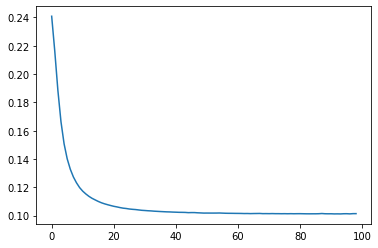

In [15]:
cnt=0
model = lstm_Model(settings.length, settings.n_of_cnn_frames, 5, 1, 1).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss().to(device)

loss_values = []
for filt, vel in dataset:
    cnt+=1
    if cnt>=100: break
    avg_cost = 0.0
    for it in range(0,settings.length):
        optimizer.zero_grad()
        frame = filt[it:it+settings.n_of_cnn_frames]
        if len(frame)< settings.n_of_cnn_frames:
            frame=np.append(frame, [np.zeros(128, dtype=bool)]*(settings.n_of_cnn_frames-len(frame)),axis=0)
        out = model(torch.Tensor(frame).view(1,1,settings.n_of_cnn_frames,-1).to(device))
        #print(out)
        loss = criterion(out, torch.Tensor(vel).view(1,128,-1).to(device))
        loss.backward()
        optimizer.step()
        print(cnt, ", ", it, " LOSS: ", loss.item())
        avg_cost += loss.item()/settings.length
    print('Data:{} cost={}'.format(cnt+1, avg_cost))
    loss_values.append(avg_cost)
plt.plot(loss_values)
        